In [0]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist # mnist data of grayscale images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load it into training and testing sets
x_train, x_test = x_train/255.0, x_test/255.0 # the data is in the range (0,255) grayscale value for each pixel, normalize it

In [0]:
print(x_train.shape, x_test.shape) # look at how many images are there

In [0]:
print(y_train.shape, y_test.shape)
print(y_train[:10])

In [0]:
# plot the first ten images
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i], cmap='gray')

In [0]:
#---------------------------------------------------
# build an autoencoder model
def create_modelAE():
    # build a sequential AutoEncoder model
    model = tf.keras.models.Sequential([
        # the input layer                               
        tf.keras.layers.InputLayer((28,28)),
        # flatten it into a single column
        tf.keras.layers.Flatten(), 
        # bottleneck layer
        tf.keras.layers.Dense(32, activation='relu'),
        # the output layer
        tf.keras.layers.Dense(28*28, activation='sigmoid'),
        # the output layer, reshape the flattened column into an image shape
	      tf.keras.layers.Reshape((28, 28, 1))
	  ])
    return model

In [7]:
modelAE = create_modelAE()
print(modelAE.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
500*500*3*32 + 32

In [0]:
model = modelAE

In [0]:
# compile, using the adamax optimizer for gradient descend and mean square error for loss
model.compile(optimizer='adamax', loss='mse')

In [10]:
# fit (train) the model on the test data. The input and the output is the same because
# we are trying to re-construct the original input after compression
train_hist = model.fit(x_train, x_train, epochs=10)                        

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0463
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0159
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0111
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0105
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104


In [0]:
#---------------------------------------------------
# plots n images in two rows, the first row is the original images
# and the second row is the reconstructed (decoded) images
def show_results(n):
    # plot
    plt.figure(figsize=(12, 12))
    for i in range(n):
        # display original image
        ax = plt.subplot(3, n, i + 1)
        ax.set_title("Original")
        plt.imshow(original[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + n)
        ax.set_title("Decoded")
        plt.imshow(decoded[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
original = []
decoded = []
n=0
# predict the first 10 items from the test set
for img in x_test[:10]:
    #predict
    pimg = model.predict(tf.expand_dims(img, 0))
    original.append(img) # original
    decoded.append(pimg.squeeze()) # predicted
    n += 1

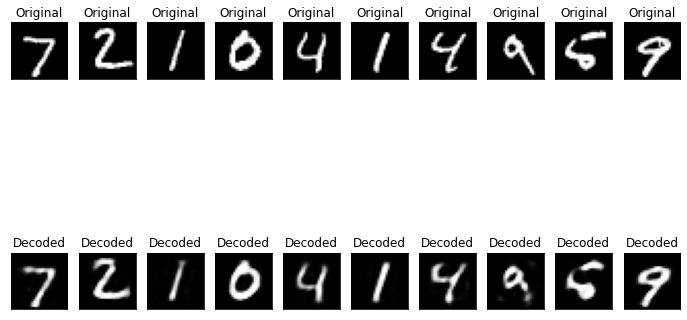

In [13]:
show_results(n)

In [0]:
28*28/32